<div style="border:solid Chocolate 2px; padding: 40px">

<b> Павел, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

## Добавление библиотек и описание функций

In [1]:
!pip install --upgrade scikit-learn -q
!pip install phik -q
!pip install shap -q
!pip install imblearn -q

In [2]:
import os
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import normaltest
import numpy as np
from statistics import pvariance
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix
import shap

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.impute import SimpleImputer


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import root_mean_squared_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from warnings import simplefilter
from sklearn.dummy import DummyClassifier, DummyRegressor

# import warnings
# warnings.filterwarnings('ignore')

import lightgbm as lgb

from time import time

RANDOM_STATE = 42
TEST_SIZE = 0.25

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!

In [3]:
def chek_data(df):
    df.info()
    display(df.head())
    display(len(df))
    print('\n\n\n')

In [4]:
def chek_duplicates(df):
    print(df.duplicated().sum())

In [5]:
def plot_data_(data):
    
    colors = ['gold', 'yellowgreen', 'lightseagreen', 'lightskyblue', 'mediumpurple', 'lightcoral', 'lightpink', 'lightgrey']
    data_num = data.select_dtypes(include='number').columns.tolist()
    data_cat = data.select_dtypes(exclude='number').columns.tolist()
    
    for i in data_num:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        fig.suptitle(f'Гистограмма по параметру "{i}"' + "\n")
        
        stat, p = stats.normaltest(data.loc[:, i])
        # stat, p = shapiro(data.loc[:, i])
        
        if p > 0.01:
            print('Нет оcнований отвергать, что распределение нормальное')
        else:
            print('Распределение нельзя назвать нормальным')
        print(f'Значение теста Шапиро-Уиллока: stat={stat:.3f}, p={p:.3f}')
        
        axes[0].set_xlabel('Единицы измерения')
        axes[0].set_ylabel('Количество')
        sns.histplot(data[i], bins=min(50, len(data[i].unique())), ax=axes[0], kde=True)

       
        axes[1].grid(True)
        sns.boxplot(x=data[i], ax=axes[1])
        axes[1].set_xlabel('Единицы измерения')
        axes[1].set_ylabel('Количество')
        plt.show()
        
    for i in data_cat:
        fig, axes = plt.subplots(figsize=(10, 15))
        plt.title(f'Гистограмма по параметру "{i}"' + "\n")
        plt.xlabel('Единицы измерения')
        plt.xticks(rotation=90)
        plt.ylabel('Количество')
        sns.histplot(data[i])
        fig.set_figheight(10)
        fig.set_figwidth(15)
        plt.show()

In [6]:
def data_load(pth):
    if os.path.exists(pth):
        data_1 = pd.read_csv(pth)
        return data_1
    else:
        print('Something is wrong')

In [7]:
def scatter_plot(num_col_names, data, nrows, depth):
    x = 0
    fig, axes = plt.subplots(nrows, 2, figsize=(20, depth))
    fig.tight_layout(h_pad=7,w_pad=7)
    axes = axes.ravel()


    for j in num_col_names:
        for i in num_col_names:
            if i > j:
                # plt.figure(figsize=(15,8));

                ax = sns.scatterplot(data=data, 
                                          x=j, 
                                          y=i, 
                                          # hue='Покупательская активность', 
                                          ax = axes[x]
                                    );
                ax.set_title(f'Диаг. расс. "{i}" и "{j}"', fontsize = 15, color = 'Black');
                ax.set_ylabel(i, fontsize=15)
                ax.set_xlabel(j, fontsize=15);
                # ax.get_legend().set_title(j)
                ax.tick_params(axis="x", labelsize=15)
                ax.tick_params(axis="y", labelsize=15)
                x += 1

In [8]:
def data_split(data):
    X = data.drop(['product'], axis=1)
    y = data['product']
    return X, y

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хороший набор функций для работы с данными - молодец, что выносишь их в начало проекта.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Не все функции используются в проекте - стоит удалить те, которые не задействованы.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Правлено*
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> `data_split` тоже не используется.

## Подготовка данных

In [9]:
data = data_load('/datasets/autos.csv')

In [10]:
chek_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


354369

В данных есть пропуски, заполним их в дальнейшем. Приведем типы данных даты и времени к соответствующему типу

In [11]:
data['DateCrawled'] = pd.to_datetime(data['DateCrawled'], format='%Y-%m-%dT%H:%M:%S')
data['DateCreated'] = pd.to_datetime(data['DateCreated'], format='%Y-%m-%dT%H:%M:%S')
data['LastSeen'] = pd.to_datetime(data['LastSeen'], format='%Y-%m-%dT%H:%M:%S')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Типы данных преобразованы.

Проверим на дубликаты и избавимся от них

In [12]:
chek_duplicates(data)

4


In [13]:
data = data.drop_duplicates()

In [14]:
chek_duplicates(data)

0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Найдены и удалены явные дубликаты.

In [15]:
data['NumberOfPictures'].unique()

array([0])

Столбец NumberOfPictures не информативен, уберем его
___
Также принято решение убрать из данных для моделирования данные о создании заказа, о последнем времени просмотра заказа и данные о сканировании заказа в виду того, что логической связи между данными признаками и ценой на авто нет.

Формируем рабочий датасет

In [16]:
data_1 = data[['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 
               'Power', 'Model', 'Kilometer', 'FuelType', 'Brand', 'Repaired']].copy()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Удалены лишние признаки.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Делая копию или срез какой-то таблицы, стоит использовать метод `copy()`: используя простое присвивание вида `a=b`, мы в переменную `a` помещаем не новый и самостоятельный объект в памяти, а всего лишь новую ссылку на объект в памяти, на который ссылается `b`. Как итог, внеся изменения в `a`, ты увидишь их и в `b`, и наоборот. Метод `copy()` позволяет создавать именно новые объекты в памяти.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Правлено*
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [17]:
data_1.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 
Для демонстрации DataFrame не стоит выводить все строки разом - это несколько усложнит визуальное восприятие. Чтобы показать просто пару строк - лучше использовать методы `head()/tail()/sample()`, если нужно оценить количество строк - можно использовать метод `shape` или функцию `len`:)
        

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Правлено*
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [18]:
chek_data(data_1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354365 non-null  int64 
 1   VehicleType       316875 non-null  object
 2   RegistrationYear  354365 non-null  int64 
 3   Gearbox           334532 non-null  object
 4   Power             354365 non-null  int64 
 5   Model             334660 non-null  object
 6   Kilometer         354365 non-null  int64 
 7   FuelType          321470 non-null  object
 8   Brand             354365 non-null  object
 9   Repaired          283211 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


354365

Переходим к заполнению пропусков рабочего датасета.
___
Если данных о ремонте нет, заполним их словом 'no'

In [19]:
data_1.loc[data_1['Repaired'].isna(), 'Repaired'] = 'no'

*Пробовал бороться по разному с предупреждением, но не особо помогло, буду благодарен, если подскажете способ или как быть.* 

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Это вот как раз к рекомендации выше про копии:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Спасибо, действительно предупреждение ушло*
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отлично.

Дальнейшие пропуски в FuelType, Gearbox, VehicleType, Model заполним соотетствующими модами. Столбец с пропущенными значениями Model запоним ориентируясь на Brand, также модой.

In [20]:
data_1['FuelType'].mode()[0]

'petrol'

In [21]:
data_1.loc[data_1['FuelType'].isna(), 'FuelType'] = data_1['FuelType'].mode()[0]

In [22]:
data_1['Gearbox'].mode()[0]

'manual'

In [23]:
data_1.loc[data_1['Gearbox'].isna(), 'Gearbox'] = data_1['Gearbox'].mode()[0]

In [24]:
data_1['VehicleType'].mode()[0]

'sedan'

In [25]:
data_1.loc[data_1['VehicleType'].isna(), 'VehicleType'] = data_1['VehicleType'].mode()[0]

In [26]:
data_1['VehicleType'].isna().sum()

0

In [27]:
data_1.loc[data_1['Brand'] == 'mitsubishi', 'Model'].mode()[0]

'colt'

In [28]:
data_1.loc[data_1['Brand'] == 'sonstige_autos'].head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
59,1,suv,1994,manual,286,NaN,150000,petrol,sonstige_autos,no
306,200,sedan,2009,manual,0,NaN,10000,petrol,sonstige_autos,no
431,3950,small,2004,auto,5,NaN,70000,gasoline,sonstige_autos,no
650,15000,coupe,1971,manual,0,NaN,5000,petrol,sonstige_autos,no
661,9900,suv,2000,auto,250,NaN,150000,lpg,sonstige_autos,no


In [29]:
for i in data_1['Brand'].unique():
    if data_1.loc[(data_1['Brand'] == str(i)) & (data_1['Model'].notna()), 'Model'].mode().empty is False:
        data_1.loc[(data_1['Model'].isna()) & (data_1['Brand'] == str(i)), 'Model'] =\
        data_1.loc[(data_1['Brand'] == str(i)) & (data_1['Model'].notna()), 'Model'].mode()[0]
    elif data_1.loc[(data_1['Brand'] == str(i)) & (data_1['Model'].notna()), 'Model'].mode().empty is True:
        print('нет моделей для бренда: ', str(i))

нет моделей для бренда:  sonstige_autos


Для бренда sonstige_autos нет ни одной модели, заполним так "unknown_model"

In [30]:
data_1.loc[(data_1['Brand'] == 'sonstige_autos'), 'Model'] =\
data_1.loc[(data_1['Brand'] == 'sonstige_autos'), 'Model'].fillna('unknown_model')

In [31]:
data_1.loc[(data_1['Model'].isna())]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired


In [32]:
chek_data(data_1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354365 non-null  int64 
 1   VehicleType       354365 non-null  object
 2   RegistrationYear  354365 non-null  int64 
 3   Gearbox           354365 non-null  object
 4   Power             354365 non-null  int64 
 5   Model             354365 non-null  object
 6   Kilometer         354365 non-null  int64 
 7   FuelType          354365 non-null  object
 8   Brand             354365 non-null  object
 9   Repaired          354365 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,sedan,1993,manual,0,golf,150000,petrol,volkswagen,no
1,18300,coupe,2011,manual,190,a4,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,no
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


354365

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Пропуски обработаны.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

В целом любая импутация пропусков сопряжена с риском внесения в модель ошибок, а удаление - с потерей обучающих примеров. При этом в случае удаления мы теряем часть бизнес-сценариев, так как ситуации, когда клиент не указывает какие-то параметры автомобиля - нередкость, и в идеале модель должна уметь обрабатывать и их.
        
При работе с категориальными признаками стоит использовать заглушки в виде новых значений категорий для заполнения пропусков: это позволит как сохранить наблюдения вместо их удаления, так и избавит нас от возможных ошибок при эмпирическом импутировании.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Спасибо, старался максимально сохранить данные. Использовал заглушку "unknown_model" для бренда "sonstige_autos". Даннлее будут срезаться только аномальные данные*
</div>

Посмотрим на распределение количественных и категориальных признаков.
___
При анализе численных параметров будет применяться статистический тест для определения нормальности распределения по параметру.

Сформулируем нулевую и альтернативную гипотезы для каждого статистического теста ниже: 

H0 - Нулевая гипотеза: нельзя отрицать, что распределение является нормальным

H1 - Альтернативная гипотеза: распределение нельзя назвать нормальным

Распределение нельзя назвать нормальным
Значение теста Шапиро-Уиллока: stat=80135.909, p=0.000


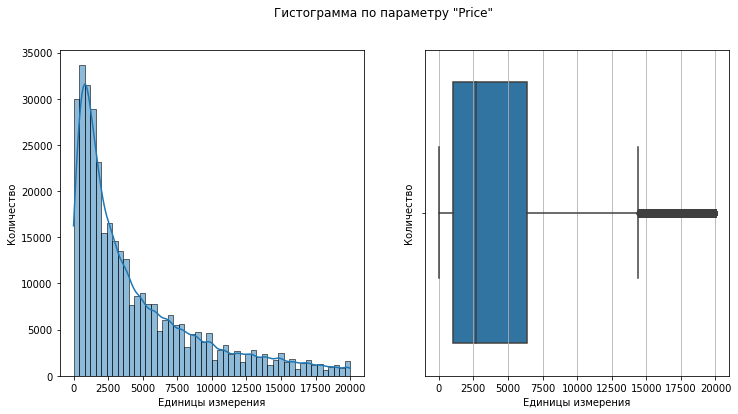

Распределение нельзя назвать нормальным
Значение теста Шапиро-Уиллока: stat=1276843.153, p=0.000


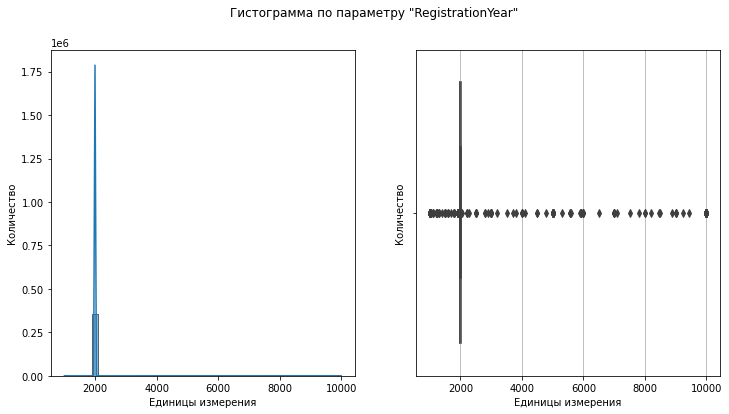

Распределение нельзя назвать нормальным
Значение теста Шапиро-Уиллока: stat=1187745.422, p=0.000


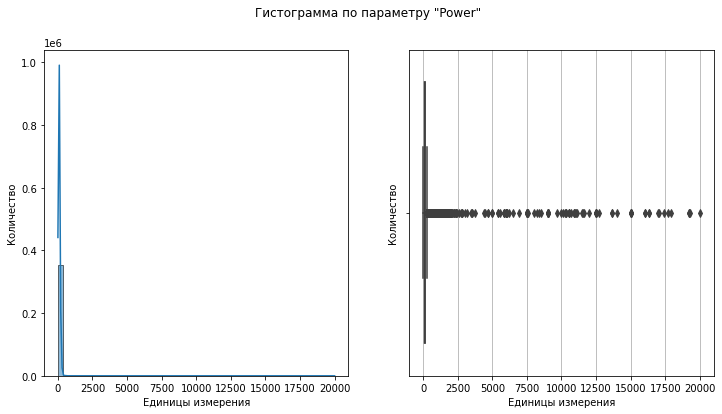

Распределение нельзя назвать нормальным
Значение теста Шапиро-Уиллока: stat=103387.857, p=0.000


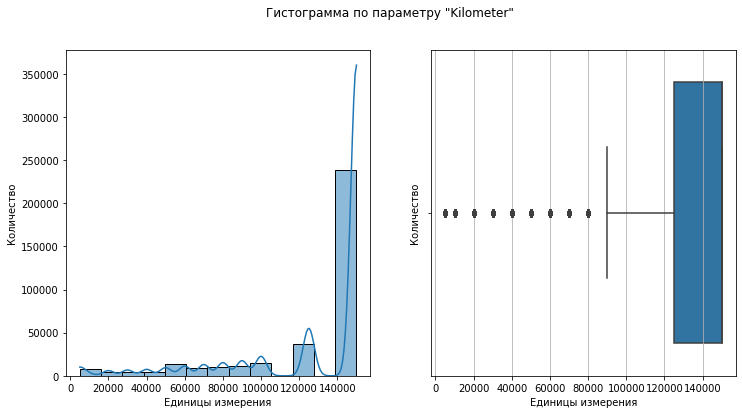

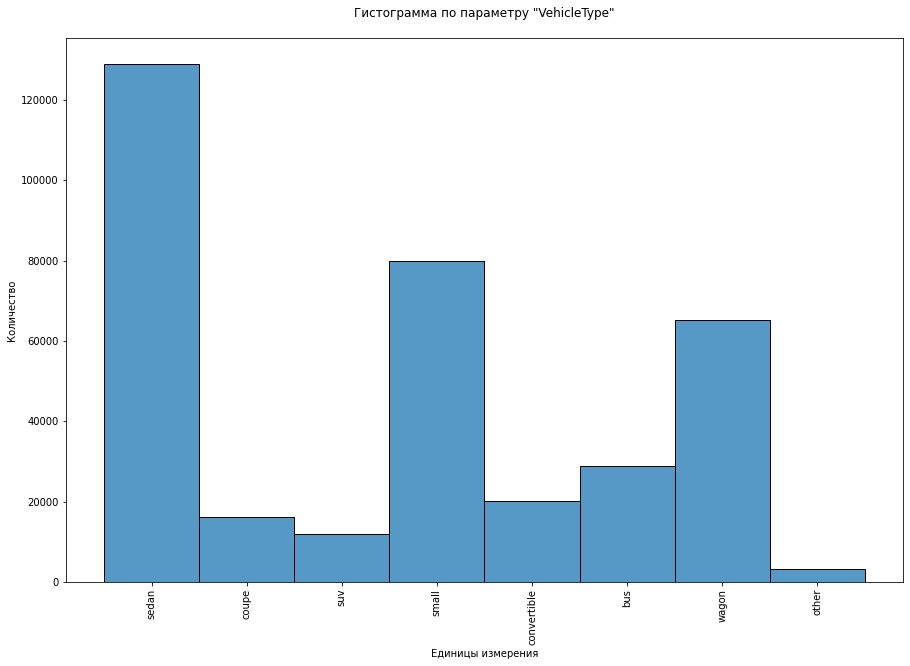

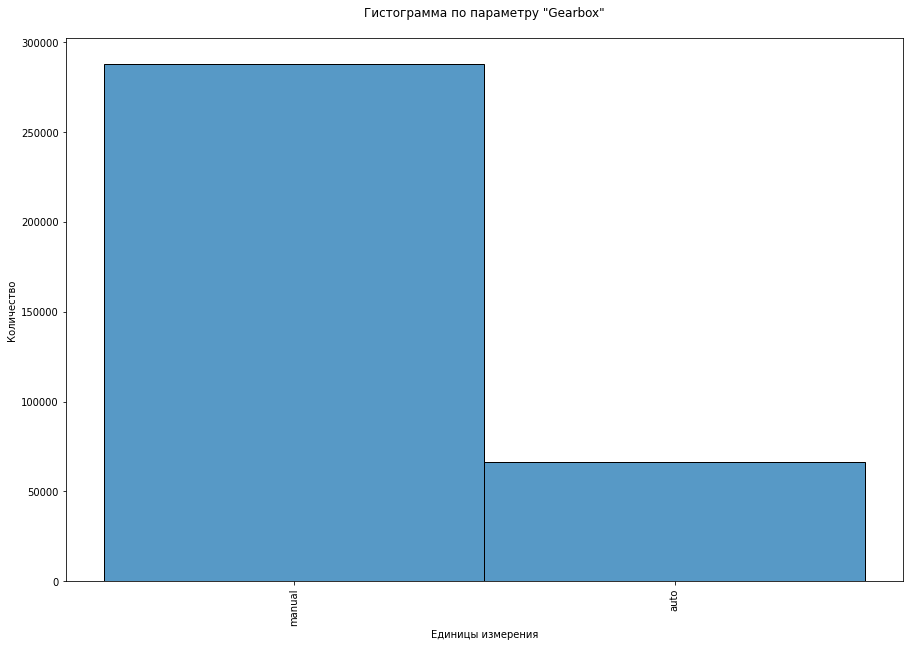

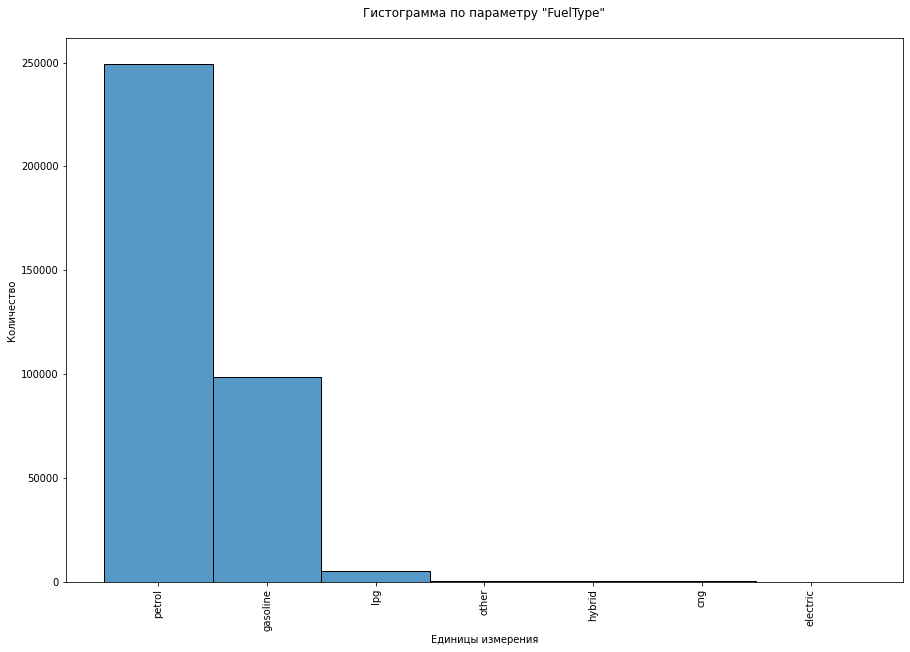

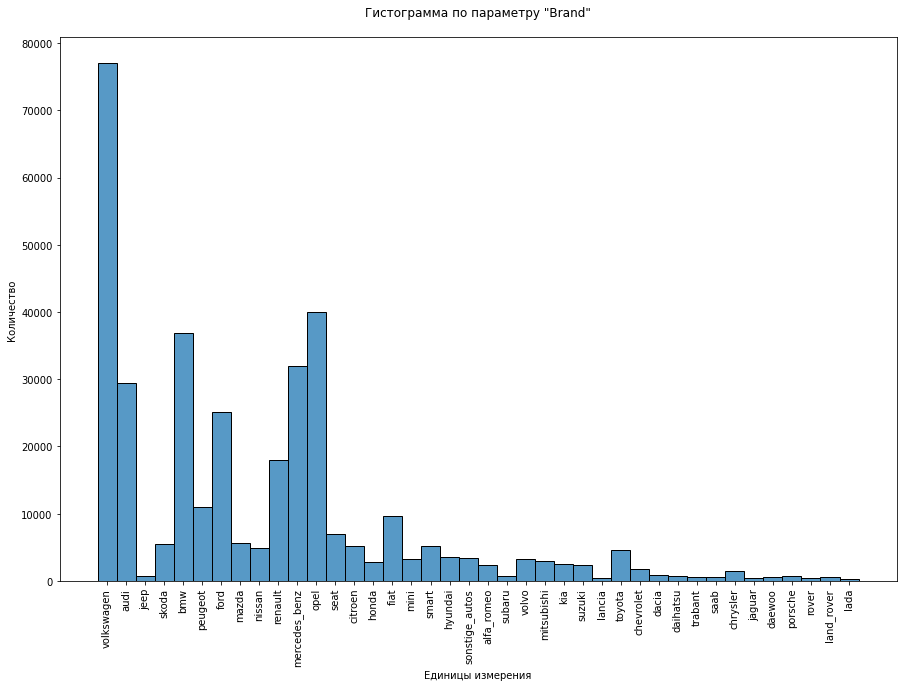

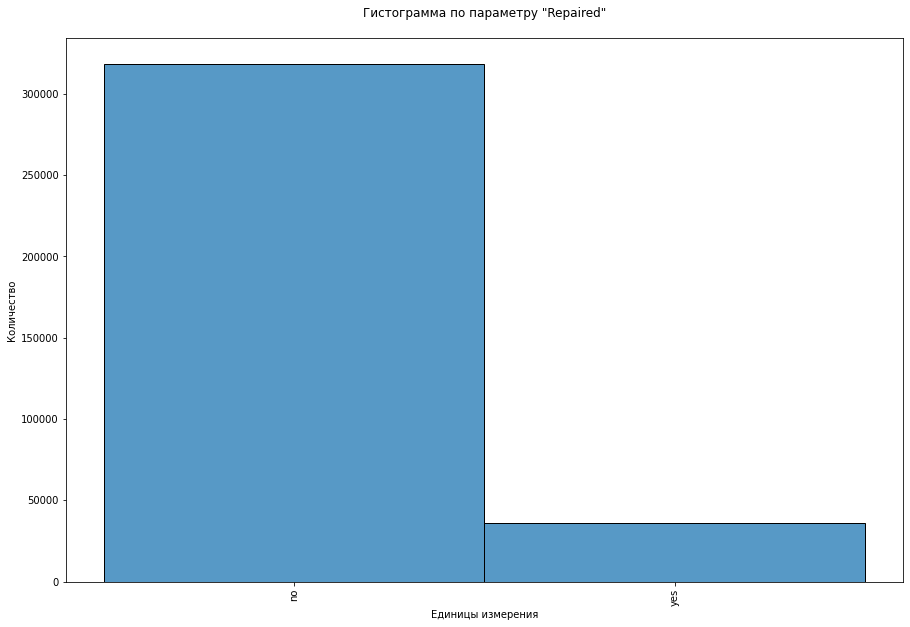

In [33]:
plot_data_(data_1[['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 
               'Power', 'Kilometer', 'FuelType', 'Brand', 'Repaired']])

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец, что дополняешь EDA статистическими тестами.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> При проведении тестов важно формулировать гипотезы - нулевую и альтернативную. Чтобы не дублировать много текста, можно сформулировать гипотезы один раз в общем виде перед началом проведения тестов.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Добавлено описание гипотез перед EDA*
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Наблюдаются аномальные значения в столбцах RegistrationYear и Power, исправим это далее.

In [34]:
data_1['RegistrationYear'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1982, 1976, 1983, 1973, 1111, 1969, 1971, 1987, 1986,
       1988, 1970, 1965, 1945, 1925, 1974, 1979, 1955, 1978, 1972, 1968,
       1977, 1961, 1960, 1966, 1975, 1963, 1964, 5000, 1954, 1958, 1967,
       1959, 9999, 1956, 3200, 1000, 1941, 8888, 1500, 2200, 4100, 1962,
       1929, 1957, 1940, 3000, 2066, 1949, 2019, 1937, 1951, 1800, 1953,
       1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911, 1933, 1400, 1950,
       4000, 1948, 1952, 1200, 8500, 1932, 1255, 3700, 3800, 4800, 1942,
       7000, 1935, 1936, 6500, 1923, 2290, 2500, 1930, 1001, 9450, 1944,
       1943, 1934, 1938, 1688, 2800, 1253, 1928, 1919, 5555, 5600, 1600,
       2222, 1039, 9996, 1300, 8455, 1931, 1915, 4500, 1920, 1602, 7800,
       9229, 1947, 1927, 7100, 8200, 1946, 7500, 35

In [35]:
len(data_1)

354365

In [36]:
data['DateCreated'].dt.year.max()

2016

In [37]:
data_1['RegistrationYear'].max()

9999

In [38]:
data_1 = data_1.query('RegistrationYear > 1980 and RegistrationYear <= 2016')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> По нижней границе фильтрация корректна.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

По верхней границе год регистрации нужно синхронизировать с датой выгрузки данных из базы: в таблице не может быть объявлений моложе даты выгрузки, иначе это были бы просто данные из будущего.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Приведено в соответствие))*
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [39]:
len(data_1)

335795

In [40]:
data_1 = data_1.query('Power < 1000')

In [41]:
len(data_1)

335519

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Удалены аномалии мощности по верхней границе.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Может быть полезно также удалить околонулевые значения мощности - некоторые значения этого признака в таблице напоминают, скорее, телегу с конём, чем автомобиль:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Выполнено далее*
</div>

Проработаем параметр Power для значений 0. Запоним его модой в соответствии с типом модели.

In [42]:
data_1.query('Power == 0').head(10)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,sedan,1993,manual,0,golf,150000,petrol,volkswagen,no
32,245,sedan,1994,manual,0,golf,150000,petrol,volkswagen,no
37,1500,sedan,2016,manual,0,kangoo,150000,gasoline,renault,no
40,0,sedan,1990,manual,0,corsa,150000,petrol,opel,no
54,4700,wagon,2005,manual,0,signum,150000,petrol,opel,no
55,550,wagon,1999,manual,0,astra,150000,gasoline,opel,yes
69,1200,coupe,2001,manual,0,astra,150000,petrol,opel,no
70,800,small,1993,manual,0,polo,150000,petrol,volkswagen,no
90,2400,sedan,2003,manual,0,a4,150000,gasoline,audi,no
94,8390,sedan,2009,manual,0,insignia,150000,petrol,opel,no


In [43]:
for i in data_1['Model'].unique():
        data_1.loc[(data_1['Power'] == 0) & (data_1['Model'] == str(i)), 'Power'] =\
        data_1.loc[(data_1['Model'] == str(i)) & (data_1['Power'] != 0), 'Power'].mode()[0]

In [44]:
data_1.loc[data_1['Model'] == 'corsa'].head(10)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
40,0,sedan,1990,manual,60,corsa,150000,petrol,opel,no
110,350,small,1998,manual,60,corsa,150000,petrol,opel,no
129,300,small,2000,manual,54,corsa,150000,petrol,opel,no
251,500,small,1999,manual,56,corsa,150000,petrol,opel,no
280,590,sedan,1996,manual,60,corsa,150000,petrol,opel,no
347,500,small,1996,manual,45,corsa,70000,petrol,opel,no
354,9999,small,2014,manual,90,corsa,20000,petrol,opel,no
395,500,small,1995,manual,45,corsa,150000,petrol,opel,no
399,650,small,1997,manual,45,corsa,150000,petrol,opel,no
401,444,small,1995,manual,45,corsa,150000,petrol,opel,no


In [45]:
data_1.query('Power == 0')

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Обработаны нулевые значения мощности.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Вместо замены одного значения признака в наблюдении, качество которого вызывает вопросы, лучше удалить всё наблюдение целиком - исправление одной некорректной точки в векторе не исправляет возможные ошибки в других точках вектора признаков.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Понял*
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Обязательно нужно удалить нулевые значения цены.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [46]:
data_1 = data_1.query('Price > 1000')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Может быть полезно также удалить неадекватно низкие значения цен: в пределах цен до 500-1000 евро вряд ли можно купить полноценный автомобиль.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Правлено, я слегка предположил, что вероятно старые машины гогтовы отдать за даром))*
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Исследуем данные после устранения аномалий
___
При анализе численных параметров будет применяться статистический тест для определения нормальности распределения по параметру.

Сформулируем нулевую и альтернативную гипотезы для каждого статистического теста ниже: 

H0 - Нулевая гипотеза: нельзя отрицать, что распределение является нормальным

H1 - Альтернативная гипотеза: распределение нельзя назвать нормальным

Распределение нельзя назвать нормальным
Значение теста Шапиро-Уиллока: stat=42942.788, p=0.000


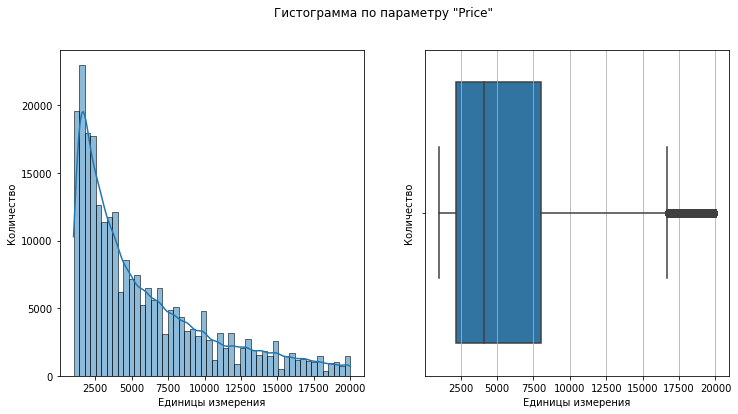

Распределение нельзя назвать нормальным
Значение теста Шапиро-Уиллока: stat=17526.605, p=0.000


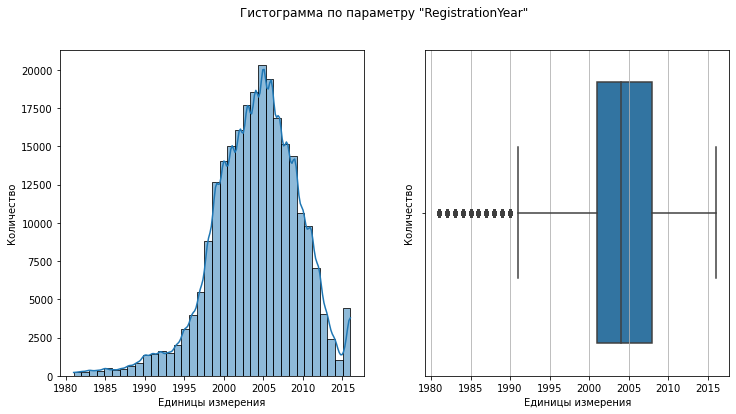

Распределение нельзя назвать нормальным
Значение теста Шапиро-Уиллока: stat=86311.541, p=0.000


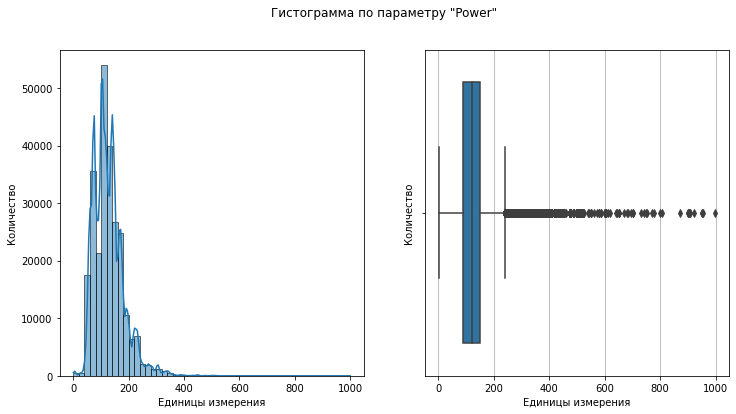

Распределение нельзя назвать нормальным
Значение теста Шапиро-Уиллока: stat=55898.575, p=0.000


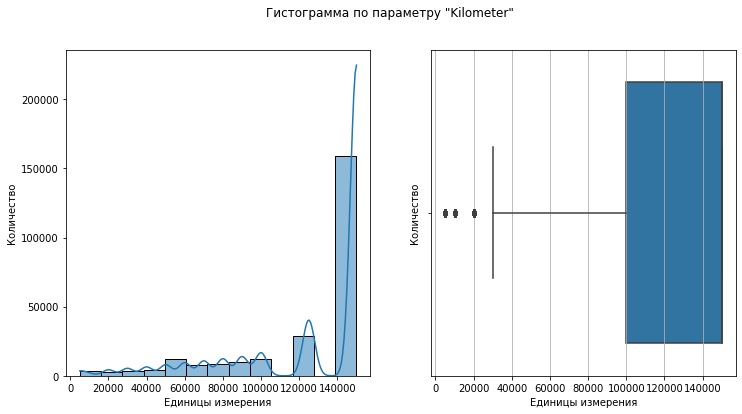

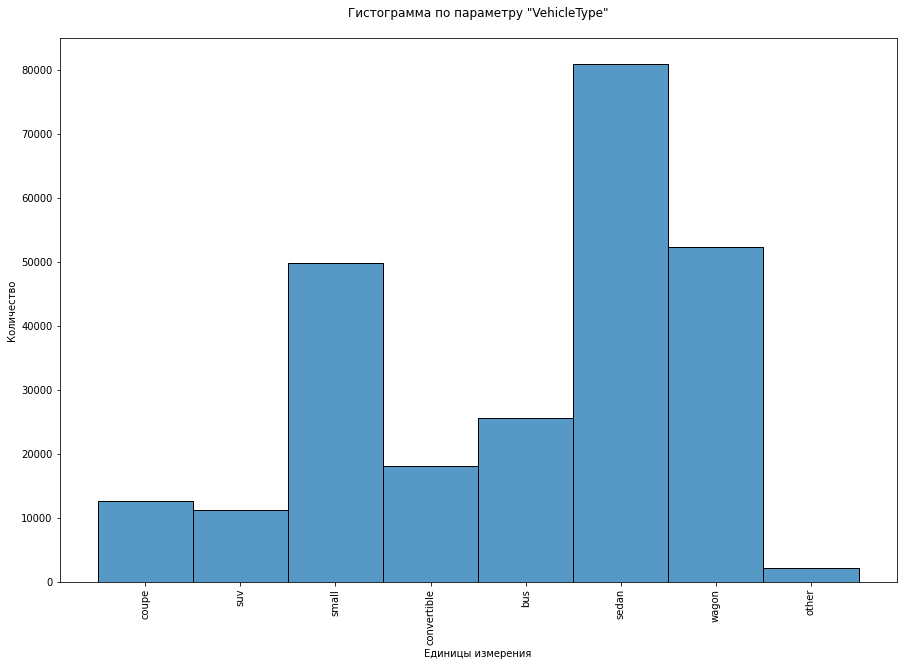

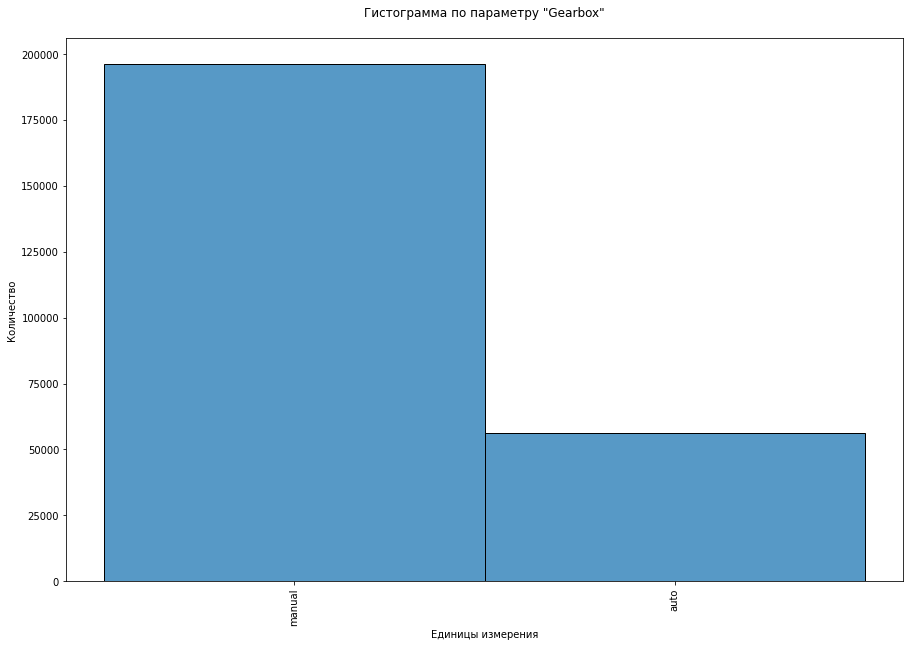

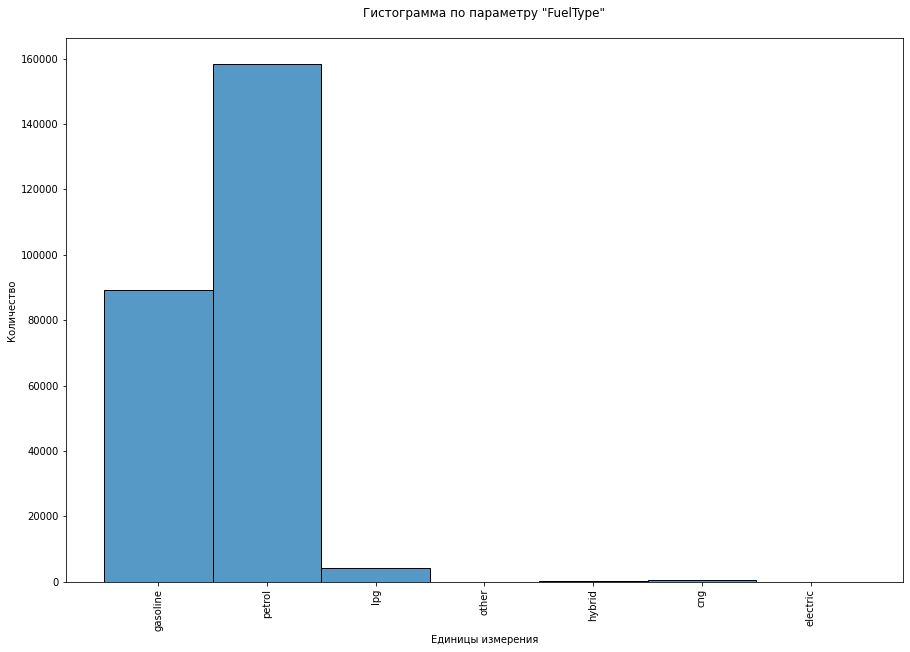

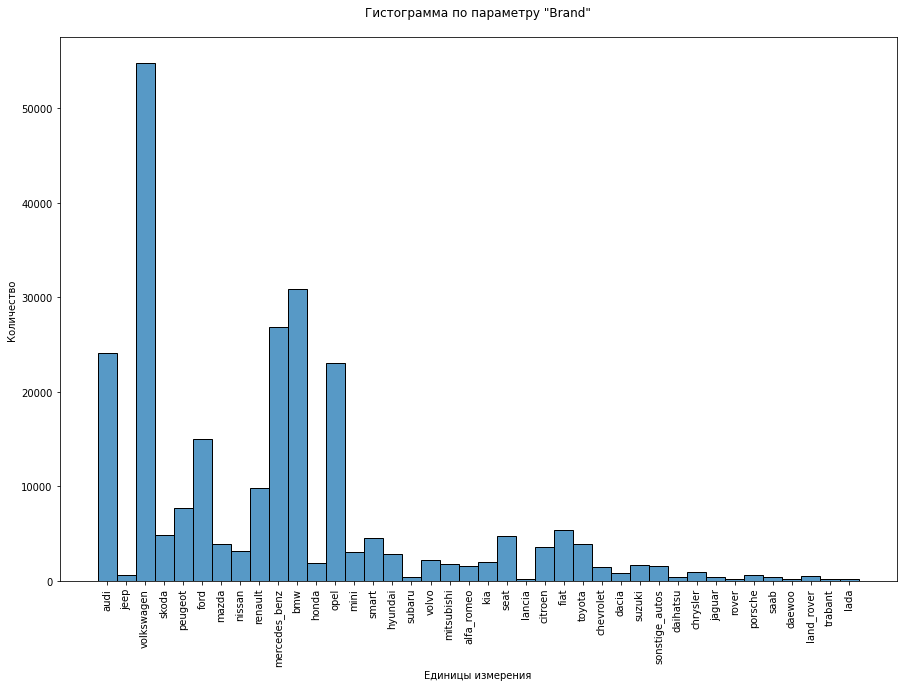

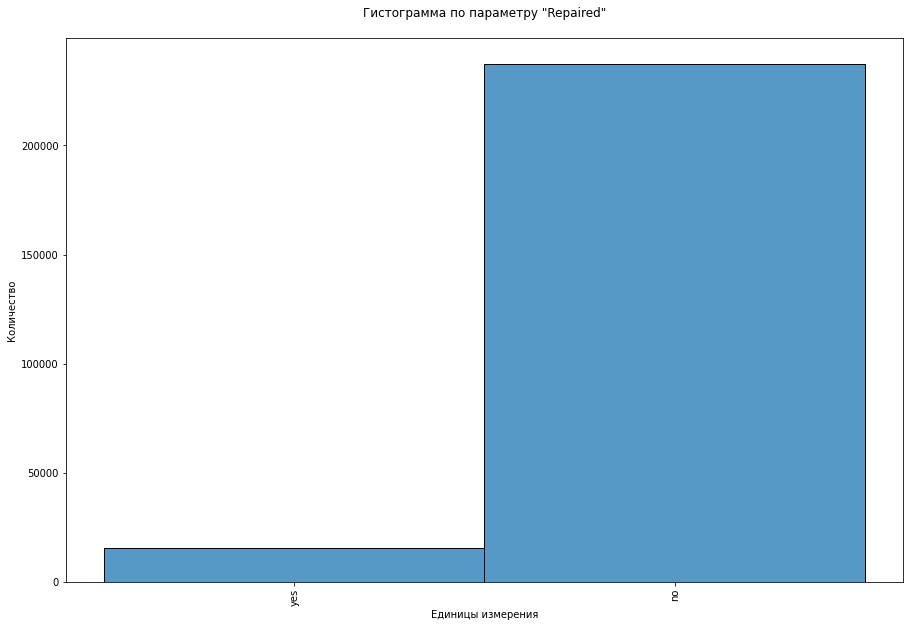

In [47]:
plot_data_(data_1[['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 
               'Power', 'Kilometer', 'FuelType', 'Brand', 'Repaired']])

Посмтроим матрицу коррелиций численных признаков.

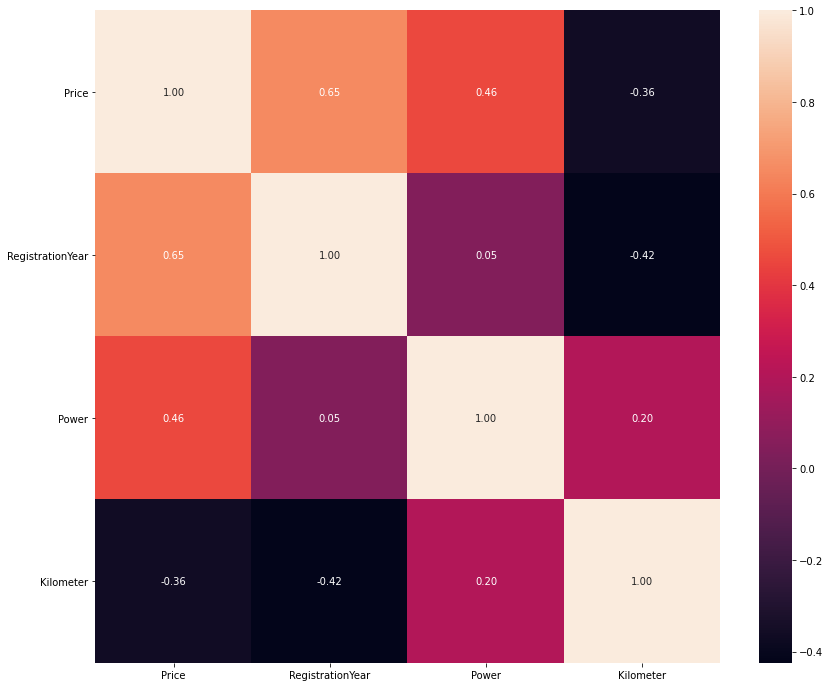

In [48]:
sns.heatmap(data_1.corr(method='spearman'), annot=True, fmt='.2f');
plt.gcf().set_size_inches(14, 12)

- Наиболее выраженная коррелиция наблюдается между целевым признаком Price и признаком RegistrationYear.
- В целом все численные признаки имеют не малые значения коррелиций с целевым.
- Между собой признаки оченьсильных коррелиций не имеют.

Построим матрицу корреляций для всех признаков

In [49]:
num_col = ['Price', 'Power']

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
`Kilometer` и `RegistrationYear` - дискретные признаки, их не нужно передавать в `interval_cols`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Сгласен, пропустил этот момент. Спасибо!*
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

(10, 10)


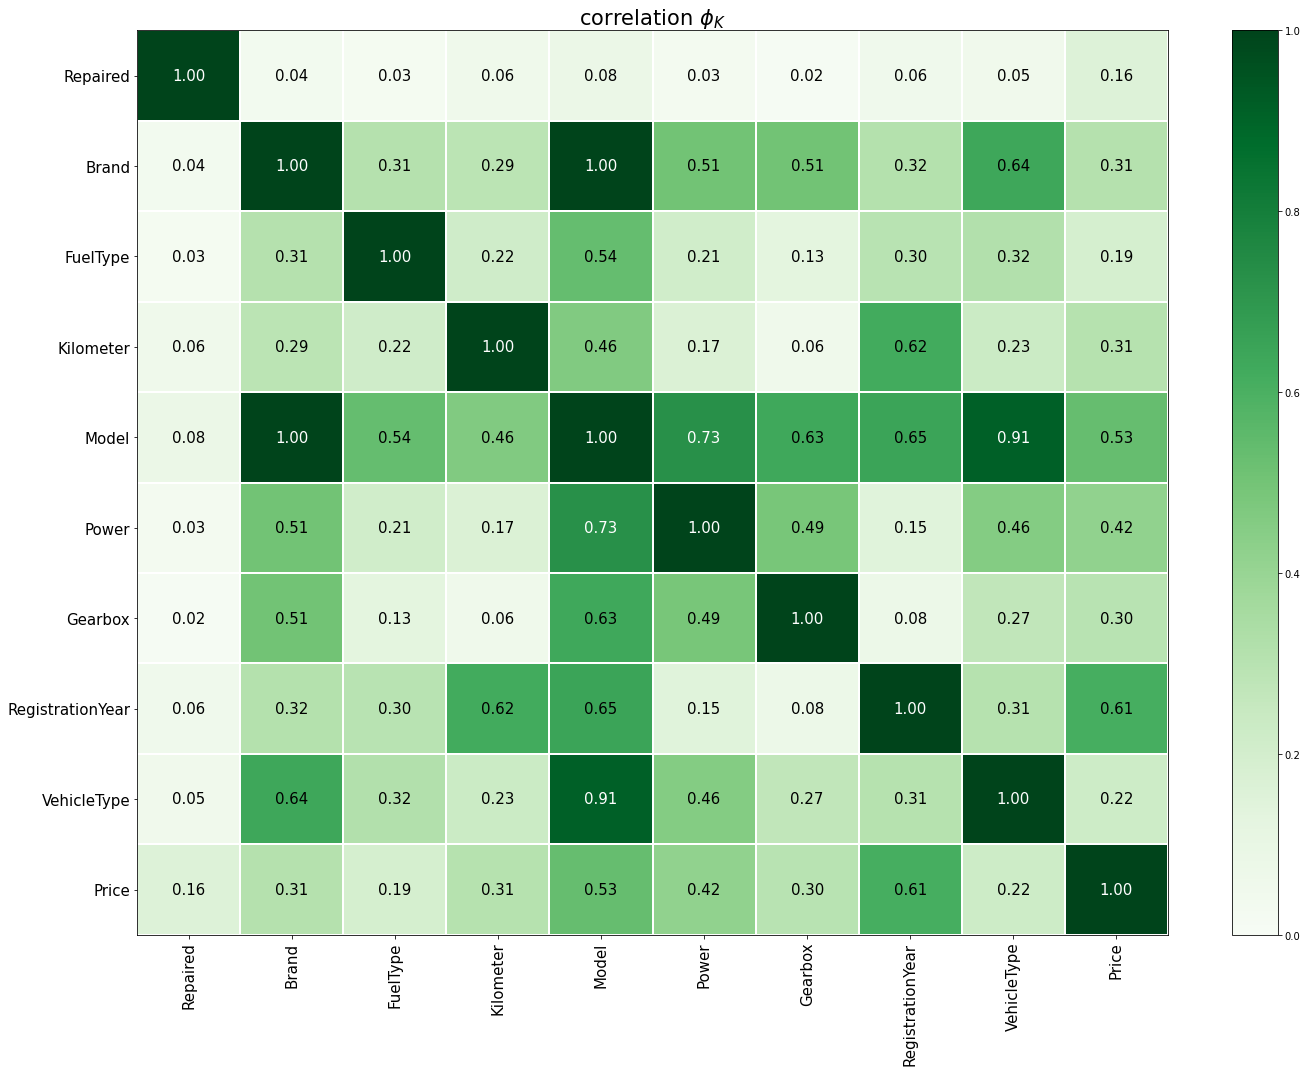

In [50]:
phik_train_ = data_1.phik_matrix(interval_cols=num_col)
print(phik_train_.shape)

plot_correlation_matrix(
    phik_train_.values,
    x_labels=phik_train_.columns,
    y_labels=phik_train_.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

-  Наблюдаются корреляции целевого признака с остальными в диапазоне от 0.23 до 0.62
- Наиболее выраженная коррелиция между целевым признакоми и признаком RegistrationYear
- Наименее выраженная корреляция между целевым признакоми и признаком VehicleType и FuelType 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Есть анализ корреляции - молодец, что используешь `phik` для анализа и нелинейных зависимостей, а также настраиваешь `interval_cols` для корректной оценки корреляции для переменных разного типа.

Построим диаграммы рассеяния между численными признаками

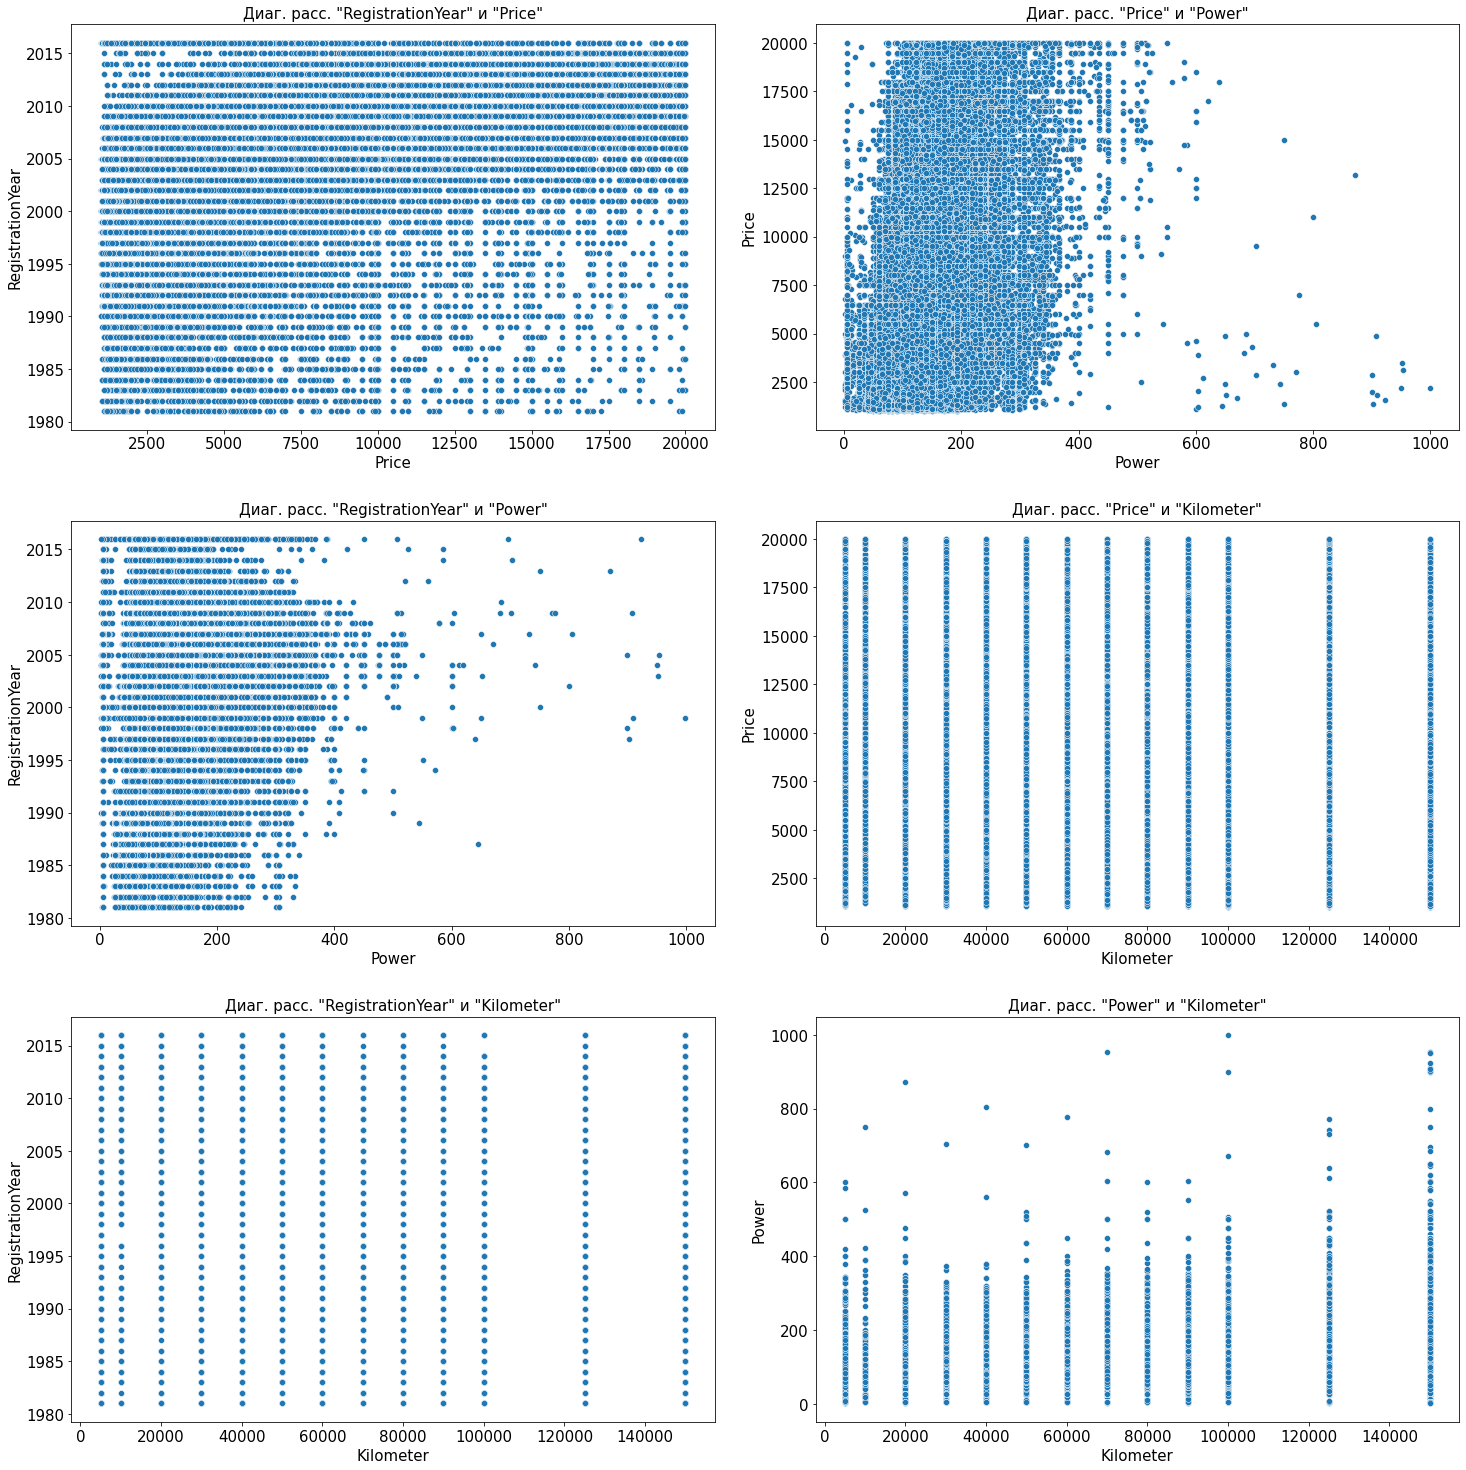

In [51]:
scatter_plot(['Price', 'RegistrationYear', 'Power', 'Kilometer'], data_1, 3, 20)

- Наблюдается зависимость между Price и Power. Общая тенденция: чем выше Power, тем выше Price.
- При более меньшем значении параметра RegistrationYear существует тенденция, что параметр Price имеет меньшее значение
- остальные признаки между собой не сильно коррелируют

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Зависимости исследованы.

Разделим датасет на тренировочную и тестовую выборки

In [52]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    data_1.drop('Price', axis=1), data_1['Price'], test_size=TEST_SIZE, random_state=RANDOM_STATE)

## Обучение моделей

In [53]:
num_columns = ['RegistrationYear', 'Power', 'Kilometer']
cat_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

Построим модель линейной регрессии

In [54]:
ohe_pipe = Pipeline(
    [
        (
            'ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [55]:
ord_pipe = Pipeline(
    [
        (
            'ord',  OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
        ),
        (
            'simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Для древесных моделей и моделей на бустингах не стоит использовать `OneHotEncoder()`: эта техника кодирования увеличивает количество признаков, в результате чего модели сложнее создавать разделяющие правила, поэтому время работы и расчётные характеристики моделей сильно страдают на больших наборах данных. Вместо этого нужно использовать `OrdinalEncoder()` - эта техника кодирует категориальные признаки так, что с ними удобнее работать в ходе создания разделяющих правил. 
    
Для бустинговых алгоритмов альетрнатинва - использование внутренних кодировщиков, которые работают лучше сторонних. В случае `CatBoost` за это отвечает параметр `cat_features`. В случае `LightGBM` можно привести эти категориальные признаки к типу `category`, тогда модель будет работать с категориальными признаками автоматически.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Добавлена модель DecisionTreeRegressor и ord кодирование.*
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [56]:
data_preprocessor = ColumnTransformer(
    [
        (
            'ohe', ohe_pipe, cat_columns
        ),
        (
            'num', MinMaxScaler(), num_columns
        )
    ], 
    remainder='passthrough'
)

In [57]:
data_preprocessor_tree = ColumnTransformer(
    [
        (
            'ord', ord_pipe, cat_columns
        ),
        (
            'num', MinMaxScaler(), num_columns
        )
    ], 
    remainder='passthrough'
)

In [58]:
pipe_final = Pipeline(
    [
        (
            'preprocessor', data_preprocessor
        ),
        (
            'model', LinearRegression()
        )
    ]
)

In [59]:
pipe_final_tree = Pipeline(
    [
        (
            'preprocessor_tree', data_preprocessor_tree
        ),
        (
            'model', DecisionTreeRegressor(random_state=RANDOM_STATE)
        )
    ]
)

In [60]:
param_grid = [
    {
        'model': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [61]:
param_grid_tree = [
    {
        'model': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'model__max_depth': range(2, 300),
        'model__min_samples_split': range(2, 10),
        'model__min_samples_leaf': range(2, 7),
        'model__max_leaf_nodes': range(2, 400),
        'preprocessor_tree__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [62]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [63]:
randomized_search_tree = RandomizedSearchCV(
    pipe_final_tree, 
    param_grid_tree, 
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> У `RandomizedSearchCV` важно настраивать `random_state` для воспроизводимости результата.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*random_state  добавлен, понял, спасибо!*
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [64]:
random_search_LR = randomized_search.fit(X_train_1, y_train_1)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


*В предупреждении речь о колонке 2 (имеется ввиду колонка до кодирования или после?). Мне не удалось сходу найти эти нееизвестные значения, потратил в районе часа на это. Может есть более простой способ узнать (чем пытаться вручную этим заниматься?), что это за неизвестное значение в категории и где оно находится? стоит ли вообще бороться с этим?  Буду благодарен* 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>  Здесь речь идёт про колонку после кодирования. Про автоматизированный поиск нового значения я не слышал, к сожалению, но очень простое решение - разница множеств, вроде `set(train[col]) - set(test[col]). 
        
Бороться с этим с помощью трансформера нет возможности, единственное, что с этим стоит делать - это переобучить модель на новых данных, но это касается уже эксплуатации готовой модели. На этапе разработки наличие в "новом потоке" новых значений - это нормально, модель должна быть устойчива к таким вещам.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Спасибо*
</div> 

In [65]:
print('Лучшая модель на тренировочных данных при кросс-валидации и её параметры:', random_search_LR.best_estimator_)
print ('Метрика лучшей модели при кросс-валидации на тренировочной выборке:', -(random_search_LR.best_score_))

Лучшая модель на тренировочных данных при кросс-валидации и её параметры: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['VehicleType', 'Gearbox',
                                                   'Model', 'FuelType', 'Brand',
                                                   'Repaired']),
                                                 ('num', 'passthrough',
                                                  ['RegistrationYear', 'Power',
                    

In [66]:
random_search_tree = randomized_search_tree.fit(X_train_1, y_train_1)

In [67]:
print('Лучшая модель на тренировочных данных при кросс-валидации и её параметры:', random_search_tree.best_estimator_)
print ('Метрика лучшей модели при кросс-валидации на тренировочной выборке:', -(random_search_tree.best_score_))

Лучшая модель на тренировочных данных при кросс-валидации и её параметры: Pipeline(steps=[('preprocessor_tree',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['VehicleType', 'Gearbox',
                                                   'Model', 'FuelType', 'Brand',
                                                   'Repaired']),
                                                

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Как видишь, твоя метрика имеет отрицательное значение - это особеность работы `scoring` с метирками с приставкой `neg_` в начале: так как метрика `RMSE` применяется для задач регрессии, то она тем лучше, чем ниже - так как по умолчанию инструменты подбора гиперпараметров и поиска лучшей модели вроде `GridSearchCV` умеют только максимизировать метрику качества. Поэтому приставка `neg_` указывает пользователю, что оптимизатор настраивается так, чтобы оптимизируемая метрика минимизировалась, а не максимизировалась - таким образом задача максимизации будет решаться через задачу минимизации обратной функции.
    
Поэтому при выводе метрики на экран её стоит сделать положительной: взять по модулю, домножить на `-1` или просто указать `-` при выводе на экран, вроде `print(-a)`.
        
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Поправил*
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.
    

Получим результаты на основе линейной модели с прменением RandomizedSearchCV

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Обучение и тестирование происходит на одном и том же наборе данных: тестирование модели на тренировочной выборке - не самое лучшее решение, так как такая проверка не оценивает прогностическую силу модели и качество предсказаний, а просто проверяет, насколько хорошо модель запомнила ответы из тренировочной выборке. Также такая проверка не учитывает эффекты недо-или переобучения, что делает эту проверку бесполезной. Куда более надёжным вариантом промежуточного тестирования является кросс-валидация - на этапе промежуточного тестирования моделей и поиска лучшего кандидата для тестирования на тестовой выборке стоит ориентироваться на метрику на кросс-валидации.
        
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Фрагмент кода убран (закоментирован). Будет определена лучшая модель по итогам оценки работы каждой и далее на лучшей модели будут спрогнозированы тестовые данные*
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Не очень понятно, зачем использовать `GridSearchCV` после `RandomizedSearchCV`: так как для модели не подбираются гиперпараметры, инструменты должны вернуть (и вернули) одну и ту е метрику на кросс-валидации. Стоит убрать одно лишнее исследование.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*поиск методом GridSearchCV убран*
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Сформируем датасет с подготовленными категориальными прзнаками для модели LightGBM. 
___
Мне не удалось за короткие сроки выяснить, позволяет ли метод LightGBM не подгатавливать отдельно признаки для него, а сразу использовать категориальные и численные признаки. Наталкивался нам ного примеров,где признаки погдатавливали перед построением данной модели. Потому я решил их подготовить. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>  Можно, через перевод категориальных признаков к типу данных `category`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Спасибо, помогло*
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отлично;)

In [68]:
columns_=(random_search_LR.best_estimator_['preprocessor'].
                                transformers_[0][1]['ohe'].
                                get_feature_names_out(cat_columns).
                                tolist() + num_columns)
X_train_prep = pd.DataFrame(
    data_preprocessor.fit_transform(X_train_1),
    columns=columns_
)
X_train_prep.head()

,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_wagon,Gearbox_manual,Model_145,Model_147,...,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_yes,RegistrationYear,Power,Kilometer
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.714286,0.063126,0.655172
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.657143,0.121242,1.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.828571,0.230461,1.000000
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,0.059118,1.000000
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.828571,0.083166,0.172414


In [69]:
num_columns = ['RegistrationYear', 'Power', 'Kilometer']
cat_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

Посмтроим модель на основе LightGBM

In [70]:
X_train_lgb = X_train_1.copy()
y_train_lgb = y_train_1.copy()
X_test_lgb = X_test_1.copy()
y_test_lgb = y_test_1.copy()

In [71]:
for i in cat_columns:
    X_train_lgb[i] = X_train_lgb[i].astype('category')
    X_test_lgb[i] = X_test_lgb[i].astype('category')

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Ниже в двух ячейках я оставил рабочие коды для модели LightGBM, но без кросс-валидации. Результат работы моделей одинаков, но выполнен код несколько по-разному. Мне будет полезно это оставить в качестве заметки на будущее. Прошу не обращать внимание.*
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Окей:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*После данных ячеек я привожу уже код с результатом с RandomizedSearchCV и подбором гиперпараметров.*
</div> 

In [72]:
# train_data = lgb.Dataset(X_train_lgb, label=y_train_lgb, categorical_feature=cat_columns)
# num_round = 30

# params = {
#     'objective': 'regression',
#    'metric': 'rmse',
#    'boosting_type': 'gbdt',
#    'num_leaves': 31,
#    'learning_rate': 0.05,
#    'feature_fraction': 0.9,
#    'random_state': RANDOM_STATE
#}

# bst = lgb.train(params, train_data, num_round)
# pred_lgb = bst.predict(X_train_lgb)
# print(f'Метрика RMSE на тренировочной выборке: {root_mean_squared_error(y_train_lgb, pred_lgb)}')

In [73]:
# model = lgb.LGBMRegressor(
#    objective='regression',
#    num_leaves= 31,
#    boosting_type='gbdt',
#    random_state=RANDOM_STATE, 
#    metric='rmse', 
#    #n_jobs=4,
#    feature_fraction=0.9,
#    learning_rate=0.05,
#    n_estimators=30
#)

# model.fit(X_train_lgb, y_train_lgb)
# pred_lgb_ = model.predict(X_train_lgb)
# print(f'Метрика RMSE на тренировочной выборке: {root_mean_squared_error(y_train_lgb, pred_lgb_)}')

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Не настроен `random_state`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Добавлено, учтено и выше, и ниже в коде*
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [74]:
model_lgb = lgb.LGBMRegressor(random_state=RANDOM_STATE)

In [75]:
param_grid_gbm = {
    'objective':['regression'],
    'num_leaves':range(15, 31),
    'boosting_type':['gbdt'],
    'metric':['rmse'], 
    #n_jobs=4,
    'feature_fraction':[0.8, 0.9],
    'learning_rate':[0.05, 0.1],
    'n_estimators':range(10, 30)
}

In [76]:
randomized_search_gbm = RandomizedSearchCV(
    model_lgb, 
    param_grid_gbm, 
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [77]:
random_search_lgb = randomized_search_gbm.fit(X_train_lgb, y_train_lgb)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGB

In [78]:
print('Лучшая модель gbm на тренировочных данных при кросс-валидации и её параметры:', random_search_lgb.best_estimator_)
print ('Метрика лучшей модели gbm при кросс-валидации на тренировочной выборке:', -(random_search_lgb.best_score_))

Лучшая модель gbm на тренировочных данных при кросс-валидации и её параметры: LGBMRegressor(feature_fraction=0.9, metric='rmse', n_estimators=27,
              num_leaves=21, objective='regression')
Метрика лучшей модели gbm при кросс-валидации на тренировочной выборке: 1921.731559985584


## Анализ моделей

Модель "линейной регрессии"

In [79]:
print('RMSE лучшей модели LR при кросс-валидации на тренировочной выборке:', -(random_search_LR.best_score_))

RMSE лучшей модели LR при кросс-валидации на тренировочной выборке: 2562.8958398831974


In [80]:
start = time()
best_model_LR = random_search_LR.best_estimator_.fit(X_train_1, y_train_1)
end = time()
model_time = (end-start)
model_time

18.353757858276367

In [81]:
start = time()
best_model_LR.predict(X_train_1)
end = time()
model_time = (end-start)
model_time

1.3946075439453125

Модель "дерево решений"

In [82]:
print('RMSE лучшей модели tree при кросс-валидации на тренировочной выборке:', -(random_search_tree.best_score_))

RMSE лучшей модели tree при кросс-валидации на тренировочной выборке: 2079.6423013807375


In [83]:
start = time()
best_model_tree = random_search_tree.best_estimator_.fit(X_train_1, y_train_1)
end = time()
model_time = (end-start)
model_time

0.8295044898986816

In [84]:
start = time()
best_model_tree.predict(X_train_1)
end = time()
model_time = (end-start)
model_time

0.294741153717041

Модель "LightGBM "

In [85]:
print('RMSE лучшей модели GBM при кросс-валидации на тренировочной выборке:', -(random_search_lgb.best_score_))

RMSE лучшей модели GBM при кросс-валидации на тренировочной выборке: 1921.731559985584


In [86]:
start = time()
best_model_lgb = random_search_lgb.best_estimator_.fit(X_train_lgb, y_train_lgb)
end = time()
model_time = (end-start)
model_time

2.3394556045532227

In [87]:
start = time()
best_model_lgb.predict(X_train_lgb)
end = time()
model_time = (end-start)
model_time

0.49949193000793457

In [88]:
2079.6423013807375 / 1921.731559985584

1.0821710714873924

In [89]:
2.5460526943206787 / 0.7376422882080078

3.4516089099310383

In [90]:
0.4364941120147705 / 0.27803850173950195

1.5699052803259879

На основе ранее полученных данных можно сделать следующие выводы: 
- Для каждой из полученных моделей использовался метод поиска решений - RandomizedSearchCV, кросс-валидация = 5.
- Посредством подбора наиболее оптимальных гиперпараметров были отобраны лучшие модели в своем классе. Далее в выводах сравниваться будут лучшие модели.
- Базовая модель линейной регрессии не дает требуемого результата: метрика данной модели немного превышает установленную 2500. 
- Модель дерева решений позволяет достичь требуемый результат: метрика данной модели находится в пределах 2080. 
- Модель на основе LightGBM позволяет достичь требуемый результат: метрика RMSE составляет около 1920, что является лучшим показателем среди всех трех моделей.
___
- Время обучения модели линейной регрессии составляет около 18 секунд.
- Время обучения модели дерева решений составляет около 0.7 секунды.
- Время обучения модели LightGBM составляет в районе 2.5 секунд.
___
- Время предсказания модели линейной регрессии составляет около 1.25 секунд.
- Время предсказания модели дерева решений составляет около 0.27 секунды.
- Время предсказания модели LightGBM составляет в районе 0.43 секунд.
___
Таким образом, наиболее точным, но не самым быстрым методом решения поставленной задачи является применение модели LightGBM. Однако если можно принебречь качеством в пользу более быстрого нахождения решения. При этом качество останется в диапазон требуемого результата. 

Применение моджели дерева решений вместо LightGBM ухудшает показатеть RMSE на 8.2%, но уменьшает время обучения модели примерно в 3.5 раза и уменьшает время предсказания в 1.6 раз на используемых для обучения данных. 
___
Так как первым критерием выбора лучшей модели стоит "качество предсказания", а времена предсказания не столь велики для двух лучших из трех моделей, то остановимся на модели LightGBM и предскажем результат на тестовых данных (ну а еще потому что это что-то новое)).

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

По этому блоку будет несколько важных замечаний:
1. Хотя бы для одной модели нужно оптимизировать не менее двух гиперпараметров. 


2. Лучшая модель должна быть выбрана по двум критериям - метрика `RMSE` и время работы модели. Далее сценарий работы с моделями в этом блоке зависит от выбранной стратегии валидации и оптимизации гиперпараметров:
- для оптимизации гиперпараметров и промежуточной оценки моделей была выделена валидационная выборка;
- для оптимизации гиперпараметров и промежуточной оценки моделей проводится кросс-валидация.
    
    В первом случае метрика промежуточной оценки модели - это метрика `RMSE` на валидационной выборке, полученная от использования на `valid` лучшей модели, а время - это время обучения модели с лучшими гиперпарметрами на `train` и время совершения ею предсказаний на `valid`.
    
    Во втором случае метрика промежуточной оценким модели - это метрика `RMSE` с кросс-валидации: в случае использования `cross_val_score` - это среднее из массива метрик (длина соответствует количеству фолдов для кросс-валидации), который возвращает инструмент, в случае использования `GridSearchCV` или `RandomizedSearchCV` - это метрика из атрибута `best_score_`. Временем работы лучшей модели может быть время обучения на `train` и время предсказания на `train` выборке (только время, метрика `RMSE` на тренировочной выборке не нужна).
    
    Тут часто студенты делают ошибку, принимая в качестве метрики времени время работы лучшей модели, а время оптимизации гиперпараметров в целом (то есть время выполнения всей ячейки кода цикла с `cross_val_score` или ячейки с `GridSearchCV`) - это некорректный подход: на практике модель не будет каждый раз переобучаться и выполнять оптимизацию гиперпараметров перед очередным предсказанием - сначала будет найдена лучшая модель, а она уже будет использоваться для обучения и предсказаний. Поэтому и в этом случае сначала определяется лучшая модель, а уже потом замеряется время её работы: кросс-валидации как альтернатива времени обучения и предсказания (потому что по сути кросс-валидация объединяет в себе обучение и предсказание) или время обучения и предсказания на `train`.
    
    Независимо от выбранной стратегии кросс-валидации алгоритм работы выглядит как:
- оптимизация гиперпараметров и поиск лучшей модели;
- оценка метрики `RMSE`;
- оценка времени работы лучшей модели: на валидационной выборке (если она выделялась) или на кросс-валидации/тренировочной выборке (если проводилась кросс-валидация).
    
Концепт для `valid`:
    
    for ... in ...:
    
        #код для поиска лучшей модели
    
    model = ... #код для инициализации лучшей модели с оптимальными гиперпараметрами
    
    model.fit(X_train, Y_train) #замеряем время обучения
    
    pred = model.predict(X_valid) #замеряем время предсказания
    
    RMSE = (Y_valid, pred) #замеряем RMSE на valid
    
Концепт для кросс-валидации:
    
    model = #инициализируем модель
    gs = GridSearchCV(...) #настраиваем поиск по сетке
    
    gs.fit(...) #находим лучшую модель
    
    gs.best_score_ #замеряем RMSE на  кросс-валидации
    
    model = gs.best_estimator_ #получаем лучшую модель из best_estimator
    model = #YourModel(random_state = 42, **gs.best_params) #альтернативный способ получения лучшей модели
    
    model.fit(X_train, Y_train) #замеряем время обучения
    model.predict(X_train) #замеряем время предсказания
    
    
   По итогу нужно будет провести сравнительную характеристику моделей по критериям метрики `RMSE` и времени работы моделей и выбрать лучшую - именно эта лучшая модель должна будет оцениваться на тестовой выборке.
    
   Обрати также внимание, что при создании таблицы нельзя использовать вручную введённые значения - они потеряют актуальность при любом изменении в данных, их обработке или в моделях. Значения метрик лучше помещать в переменные и использовать их для создания таблиц. Для сохранения в переменные времени работы моделей можно использовать модуль `time`:
    
    from time import time
    
    start = time()
    
    #код модели
    
    end = time()
    
    model_time = (end-start)/60 #перевожу в минуты, так как по умолчанию секунды

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Код исправлен выше в соответствии с замечаниями, параметры оптимизированы путем выбора лучших моделей методом RandomizedSearchCV*
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [91]:
pred_lgb_test = best_model_lgb.predict(X_test_lgb)

In [92]:
print(f'Метрика RMSE на тестовой выборке лучшей модели: {root_mean_squared_error(y_test_1, pred_lgb_test)}')

Метрика RMSE на тестовой выборке лучшей модели: 1899.8406189388973


<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Лучшую модель оценили на `test` - отличный результат!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки? 
    
В качестве константной модели можно использовать `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) -  эта модель как раз создана для генерирования константных предсказаний.
    
Важно, чтобы результат тестирования нашей модели на тествой выборке был лучше, чем результат константной модели - в противном случае наша модель является бесполезной, так как все наши усилия над проектом не принесли результата, а можель, просто предсказывющая среднее на `train`, делает нашу работу лучше.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*DummyRegressor добавлен*
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Сравним результаты предсказания с результатами предсказания dummy_model. Оценим модель на адекватность.

In [93]:
dummy_model = DummyRegressor()

X_train_dummy = data_preprocessor_tree.fit_transform(X_train_1, y_train_1)
X_test_dummy = data_preprocessor_tree.transform(X_test_1)

dummy_model.fit(X_train_dummy, y_train_1)
dummy_model_preds = dummy_model.predict(X_test_dummy)

      
print(f'Метрика RMSE на тестовой выборке с переданными вероятностями для параметров:', root_mean_squared_error(y_test_1, 
    dummy_model_preds))      

Метрика RMSE на тестовой выборке с переданными вероятностями для параметров: 4534.933869437554


Как можно заметить, работа проделана не зря. Метрика модели dummy_model значительно хуже полученной посредством лучшей выбранной модели.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Подпись кода взята из предыдущего проекта - стоит скорректировать на актуальную.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Правлено*
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

## Выводы

- Получены данные рынка автомобилей, успешно выгружены. На их основе создан датасет в Pandas. Требовалось построить модель, которая будет предсказать целевой признак - стоимость авто на основе полученных данных. 
- Данные подготовлены: 
    - Иправлены типы данных по необходимости.
    - Удалены неинформативные для обучения модели данные.
    - Заполнены пропуски в данных.
    - Данные очищены от аномальных значений.
- Проведен исследовательский анализ данных, построены гистограммы и диаграммы размаха.
- Проведен корреляционный анализ признаков и визуализирована связь между признаками.
- Построена модель линейной регрессии.
- Построена модель дерева решений.
- Построена модель LightGBM на основе градиентного бустинга.
- Проведен анализ моделей по качеству предсказаний, времени обучения и времени предсказания.
- Среди построенных моделей выбрана наиболее оптимальная на основе выводов из анализа моделей - LightGBM.
- Посредством модели LightGBM предсказан целевой признак на тестовой выборке.

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Павел, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.
    
Отмечу отличную предобработку данных - были найдены и корректно обработаны почти все аномалии и пропуски, также выполнено кодирование категориальных переменных и масштабирование непрерывных.
    
Работа с моделями также выполнена отлично: исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `GridSearchCV`, выполнена промежуточная оценка моделей на кросс-валидации - молодец!
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: итоговый вывод по проекту.

Павел, все замечания учтены - проект принят!
    
Спасибо за хорошую работу над проектом, желаю успехов в дальнейшем обучении:)